In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="ticks")

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr
import matplotlib.font_manager as font_manager

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams


sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 2.5})

In [13]:
data = pd.read_csv('train.csv')
data_new = data.copy()

data_new.drop(['YrSold', 'YearBuilt',  ], axis =1)

columns_noncont = ["MSZoning","LotFrontage", "Neighborhood", "Condition1",
                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation",
                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond", "SalePrice"]

cont_features = ["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "YearRemodAdd", "GarageYrBlt", "MasVnrArea", 
                 "LotArea", "BsmtFinSF1", "WoodDeckSF", "OpenPorchSF", "2ndFlrSF", "BsmtUnfSF", "ScreenPorch", 
                 "PoolArea", "3SsnPorch", "BsmtFinSF2", "MiscVal", "LowQualFinSF", "EnclosedPorch", "Age"]            
#columns_all = columns_noncont + list(X_all_cont.columns[0:-1]) + ['SalePrice']

data_all = data_new[columns_noncont]

data_all = data_all.dropna().reset_index(drop=True)
print np.shape(data_all)

(1097, 24)


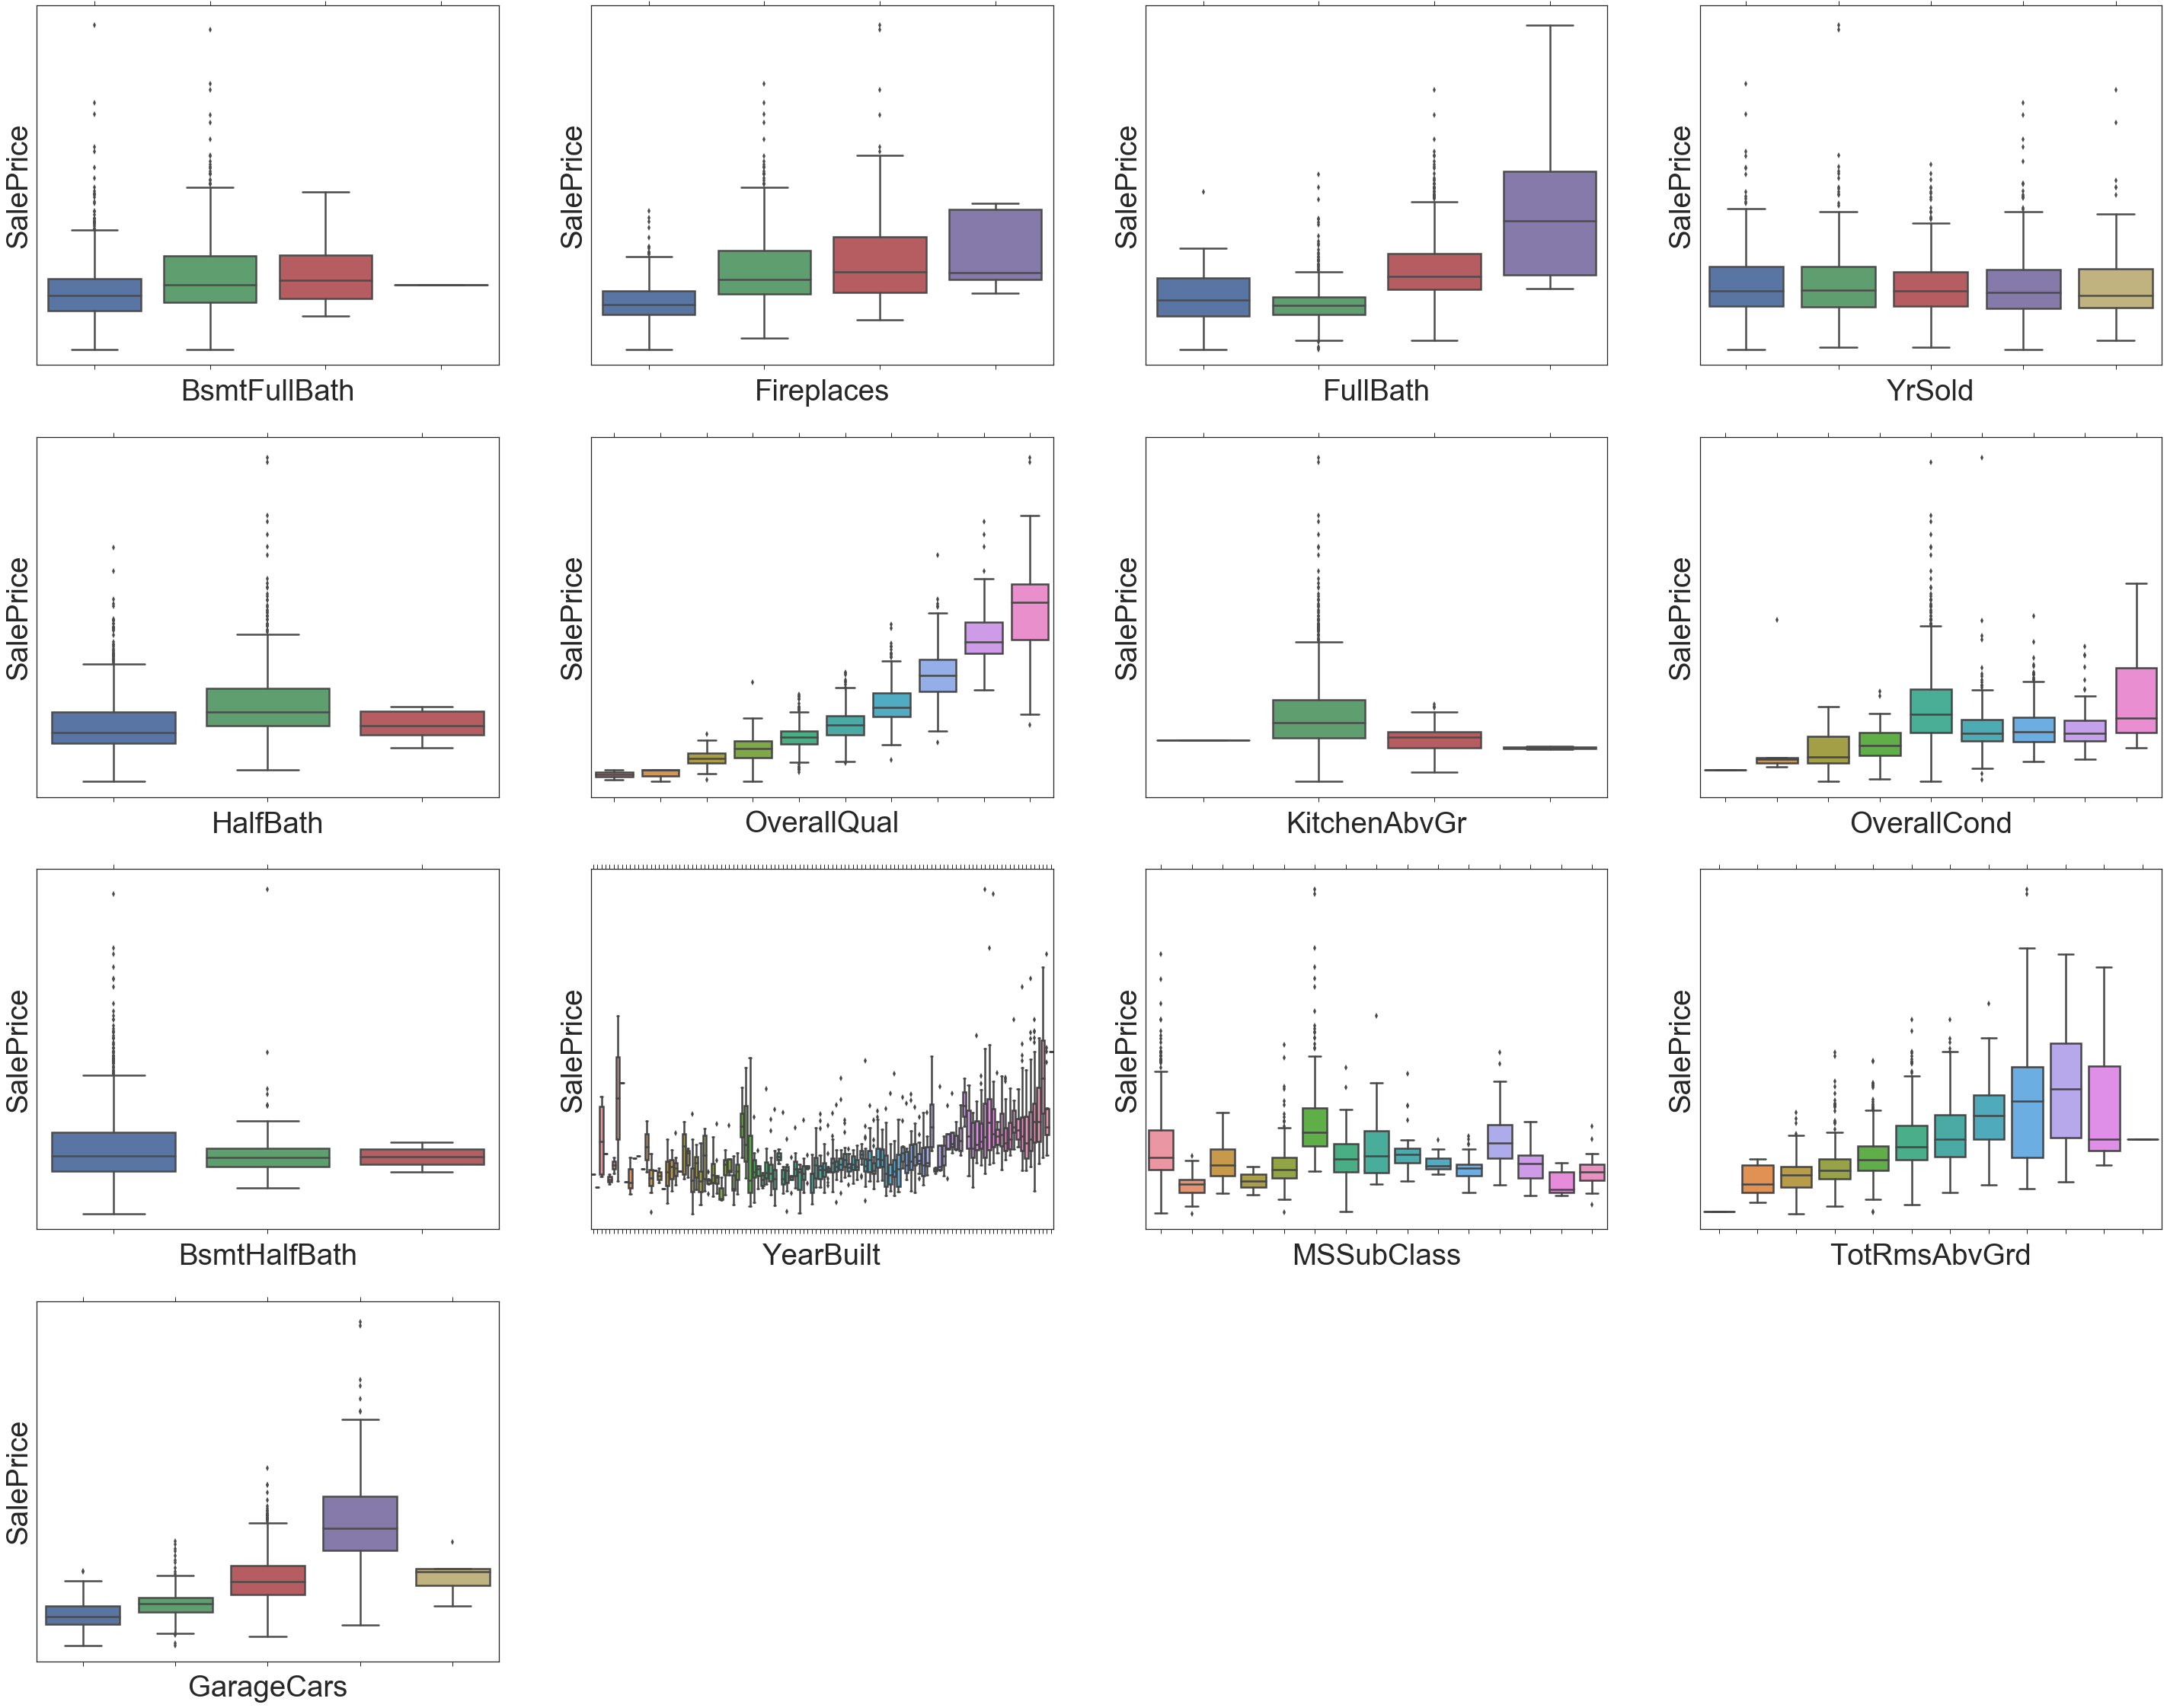

In [14]:

# Discrete features.
discrete_features = list(set(list(data.columns[data.dtypes == 'int64'][1:-1])) - set(cont_features))
plt.figure(figsize=(50, 100))

for i, feature in enumerate(discrete_features[1:-1],1):
    if feature not in cont_features:
        plt.subplot(10, 4, i)
        g = sns.boxplot(x=feature, y="SalePrice", data=data)
        g.set(xticklabels=[])
        plt.xticks( rotation=45)
        plt.yticks(())

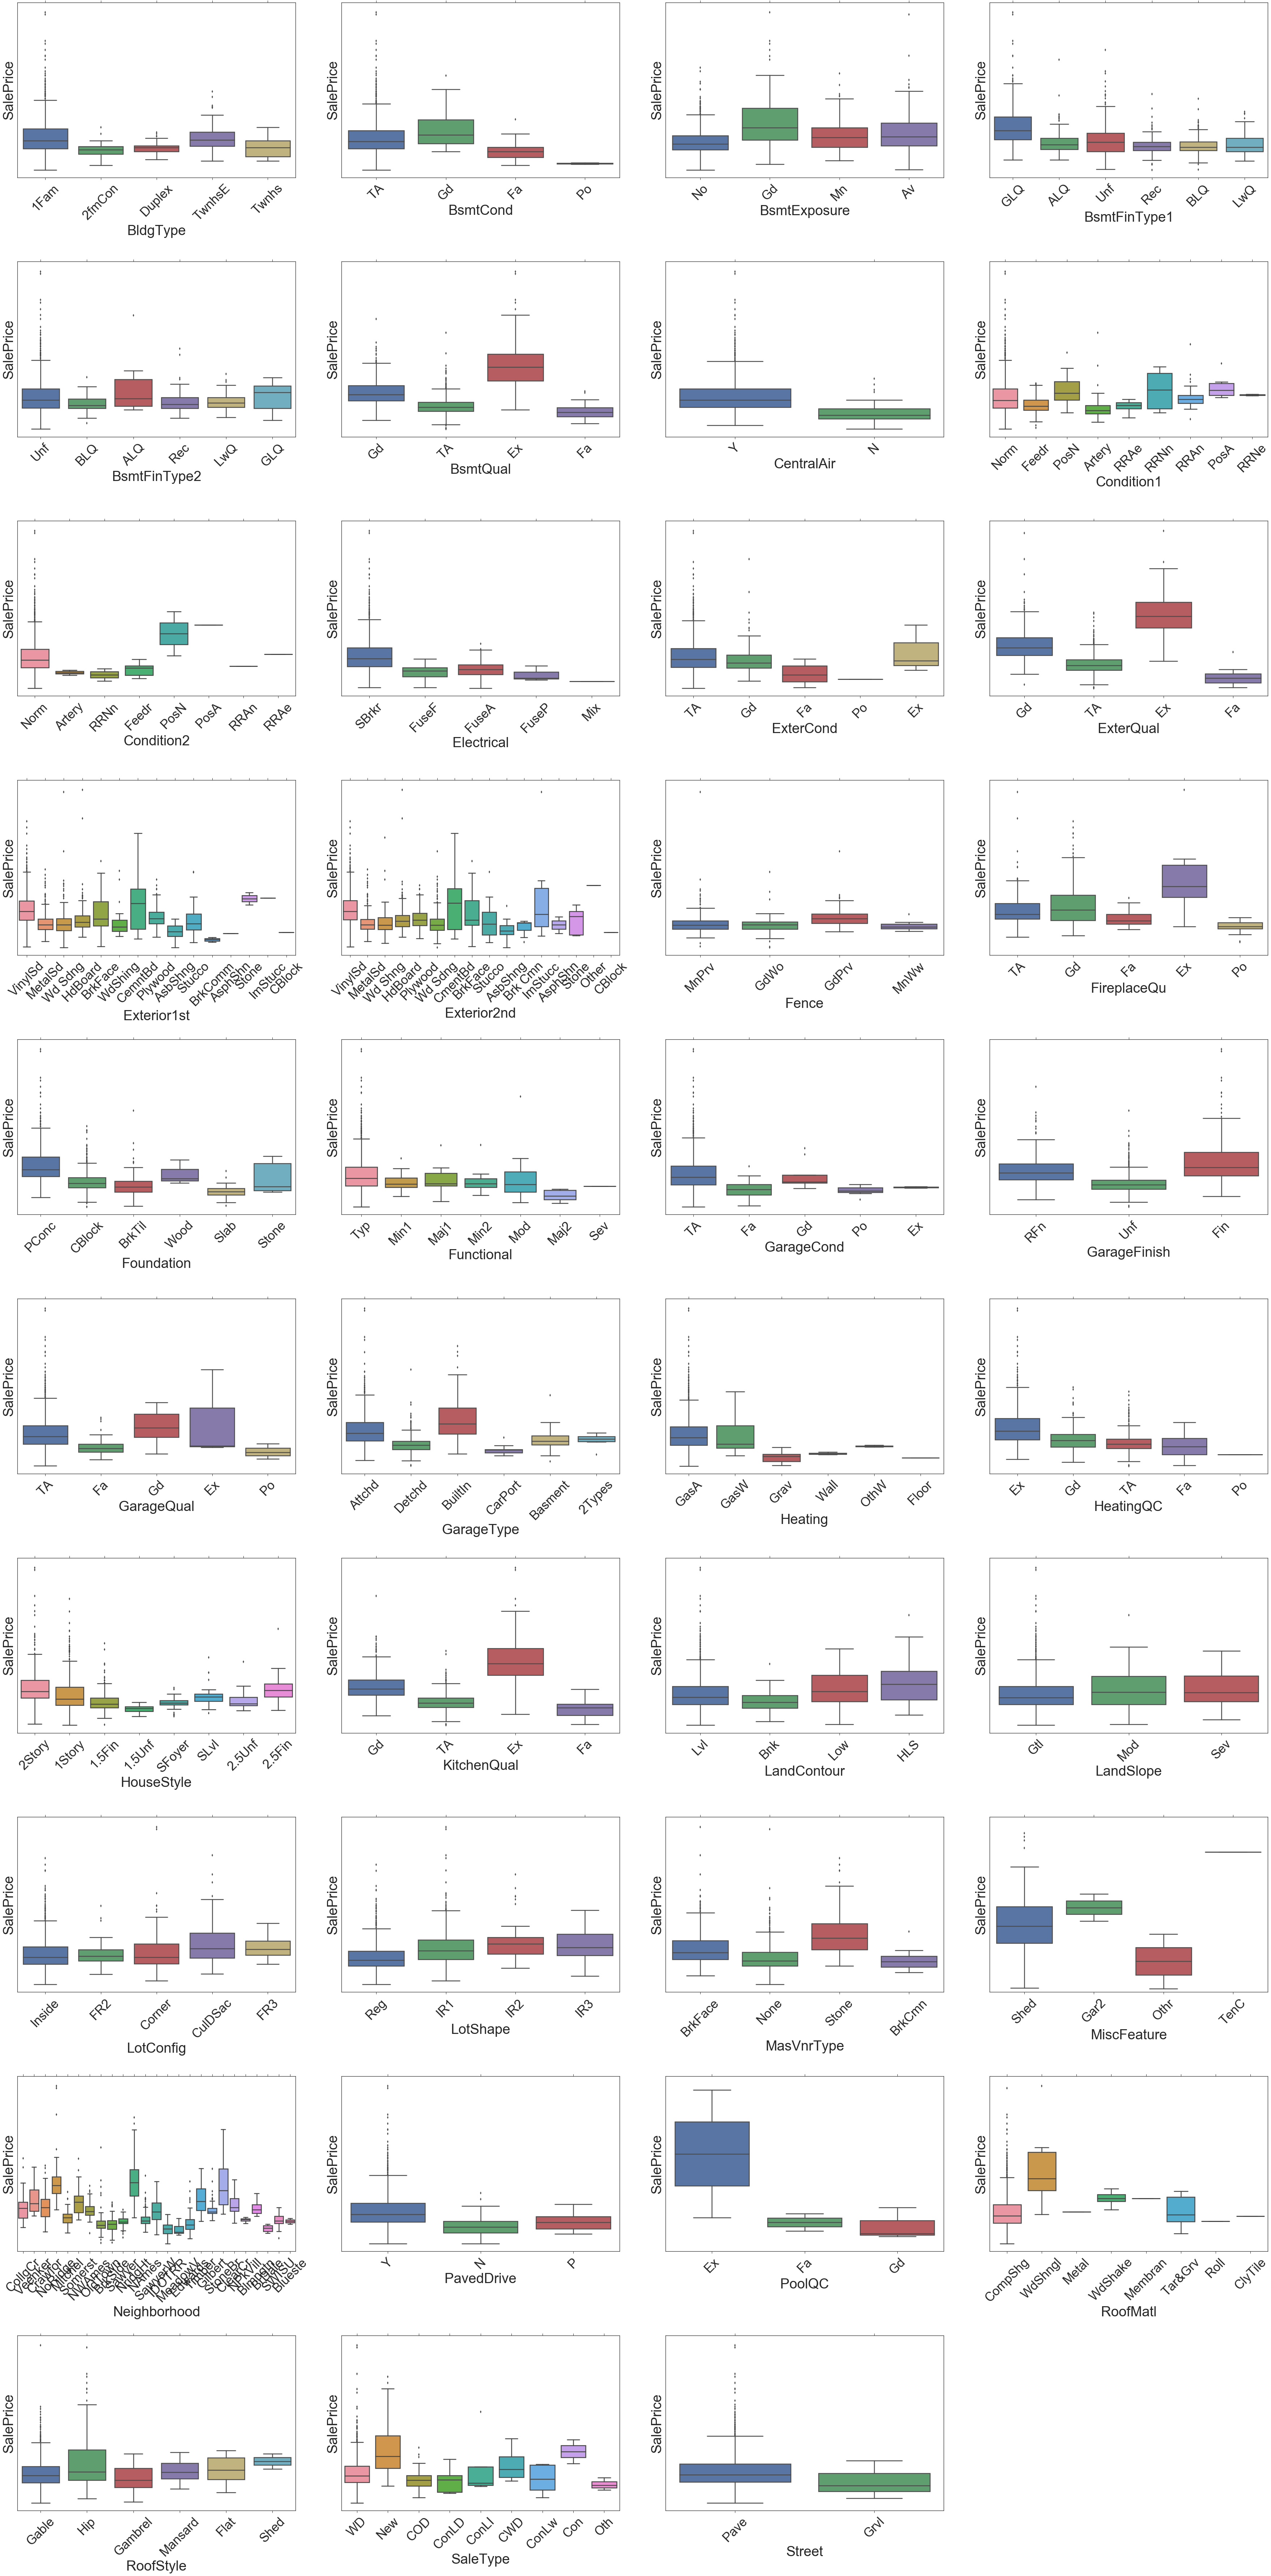

In [15]:
category_features = sorted(list(set(list(data.columns[data.dtypes == object][1:-1])) - set(cont_features)))
plt.figure(figsize=(50, 100))

for i, feature in enumerate(category_features[1:-1],1):
    if feature not in cont_features:
        plt.subplot(10, 4, i)
        # Determine the order of boxes
        g = sns.boxplot(x=feature, y="SalePrice", data=data)
        plt.xticks( rotation=45)
        plt.yticks(())
plt.tight_layout()
#columns_noncont = ["MSZoning","LotFrontage", "Neighborhood", "Condition1",
#                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation",
#                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
#                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond"]
#

In [16]:
def pairsplot(df, features):
    g = sns.pairplot(df, x_vars=features, y_vars=["SalePrice"],
             size=5, aspect=.8, kind="reg");
    return g

In [17]:
cat_columns = sorted(data.select_dtypes(['object']).columns)

for column in cat_columns:
    data[column] = data[column].astype('category')

#print data.dtypes[data.dtypes == 'category']
#print cat_columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

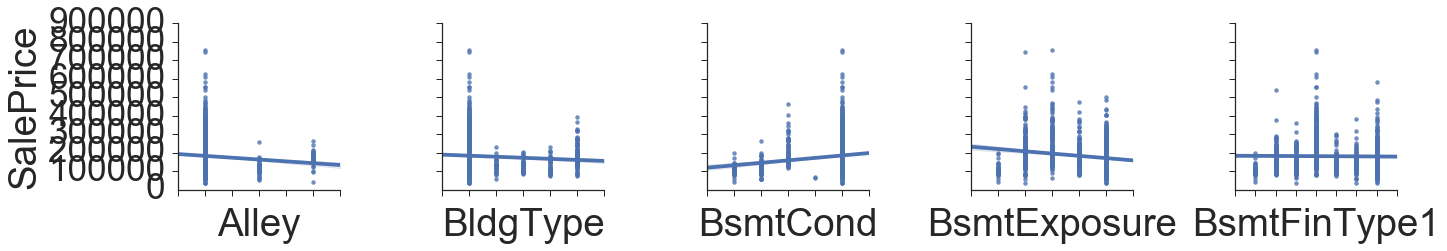

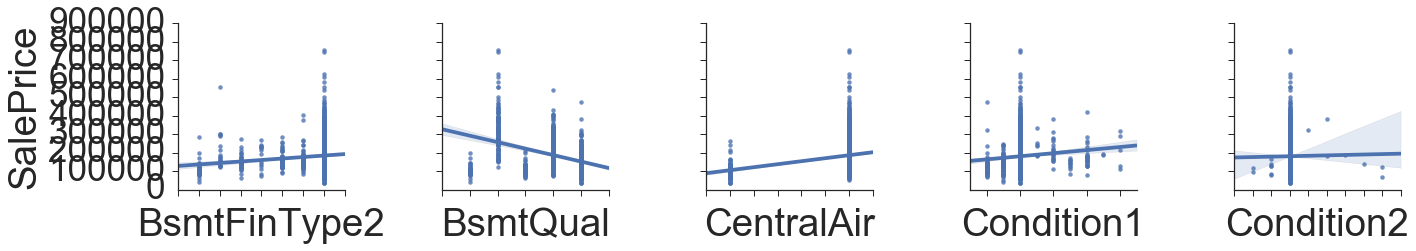

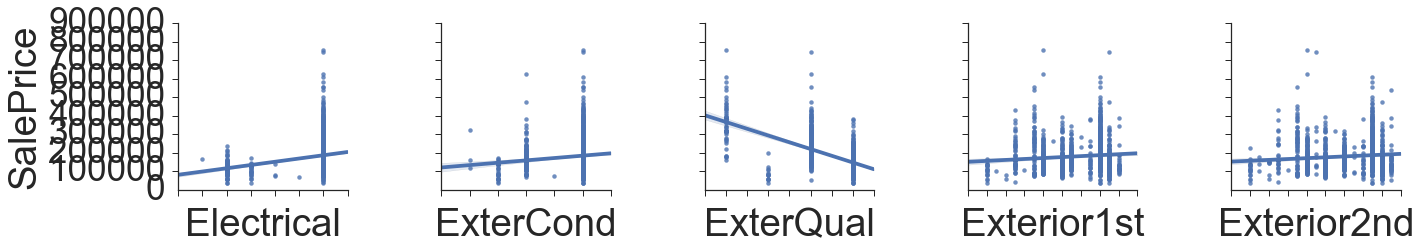

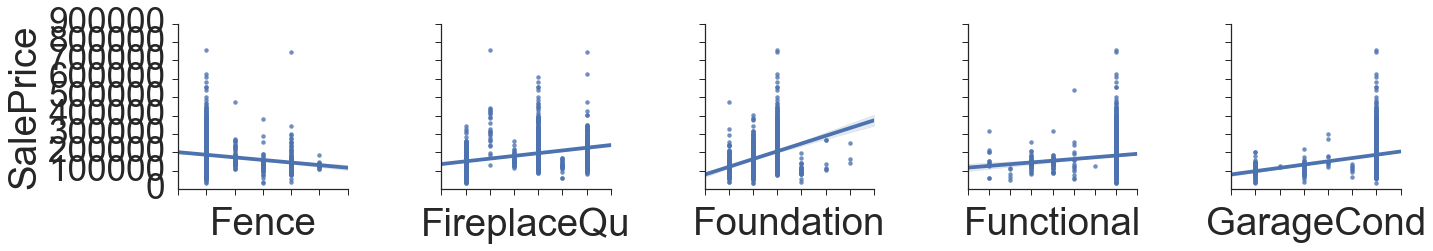

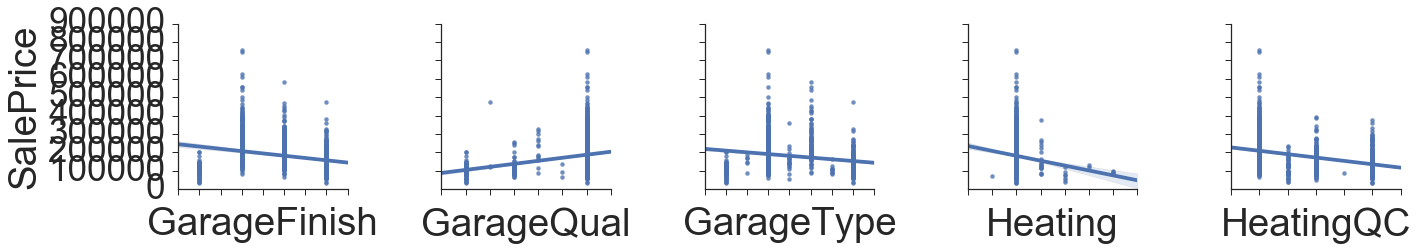

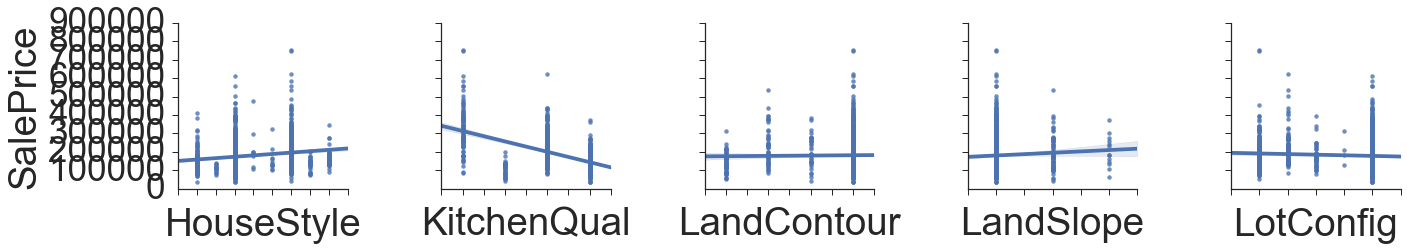

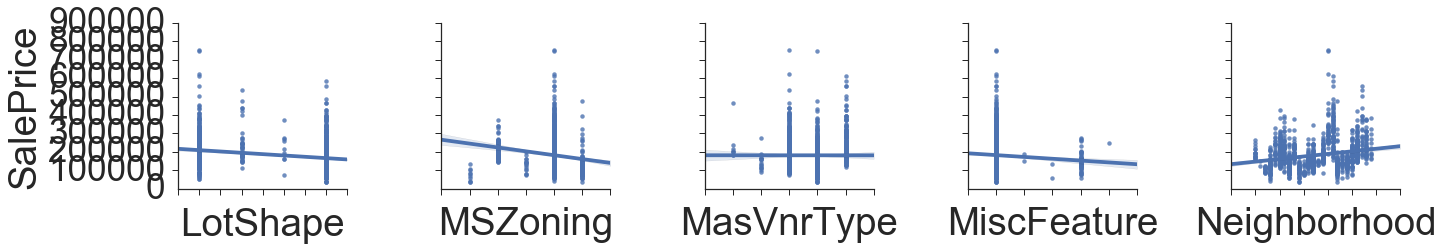

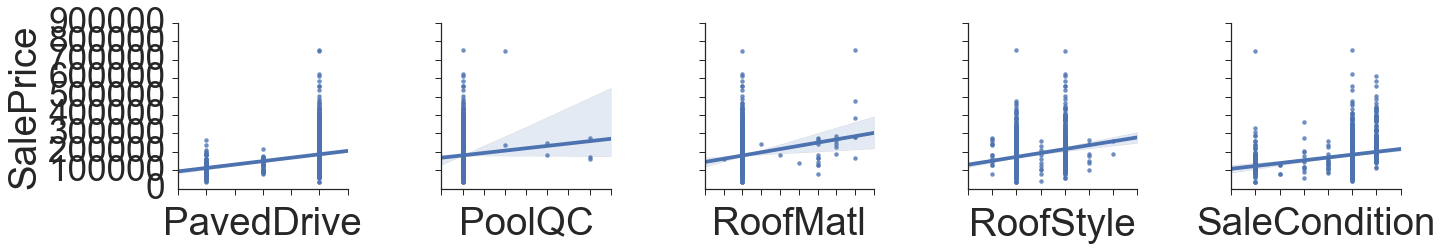

In [18]:
for j in range(0, len(cat_columns)-5, 5):
    g = pairsplot(data, cat_columns[j:j+5])
    plt.ylim(4,)
    g.set(xticklabels=[])

#pairsplot(data_continuous, data_continuous.columns[14:19])